In [2]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms, datasets 
from torch import optim, nn

In [3]:
# Creating transformation
normalized = transforms.Normalize((0.5,), (0.5,))
tensor = transforms.ToTensor()
transformation = transforms.Compose([tensor, normalized])

In [4]:
# Loading dataset
training_dataset = datasets.MNIST('/bytefiles',download=True, train=True, transform=transformation)
testing_dataset = datasets.MNIST('/bytefiles',download=True, train=False, transform=transformation)

train_data = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=True)

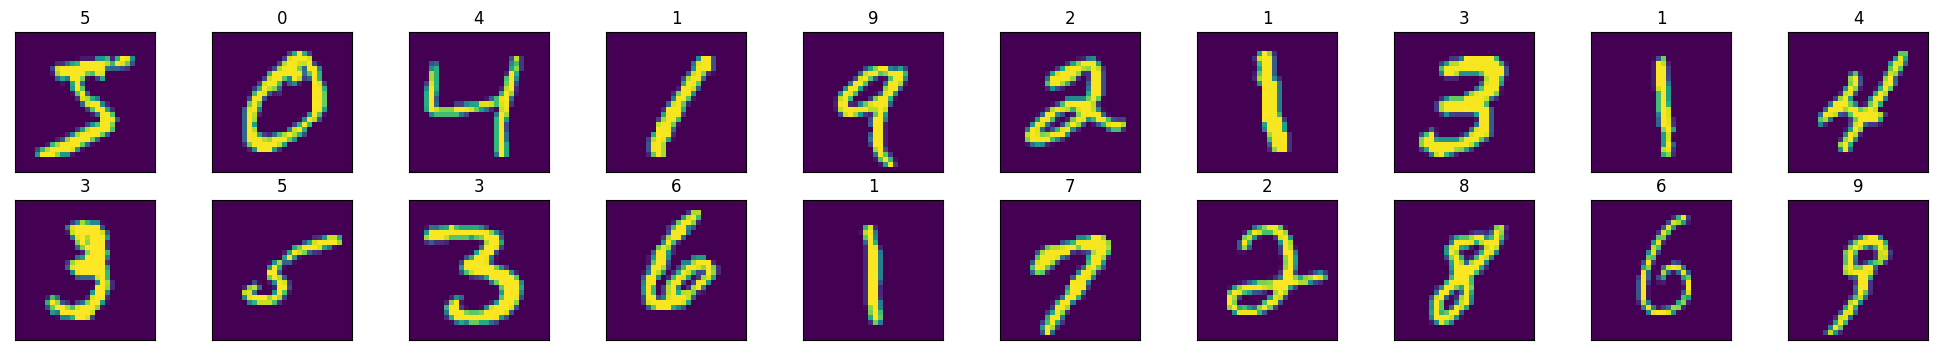

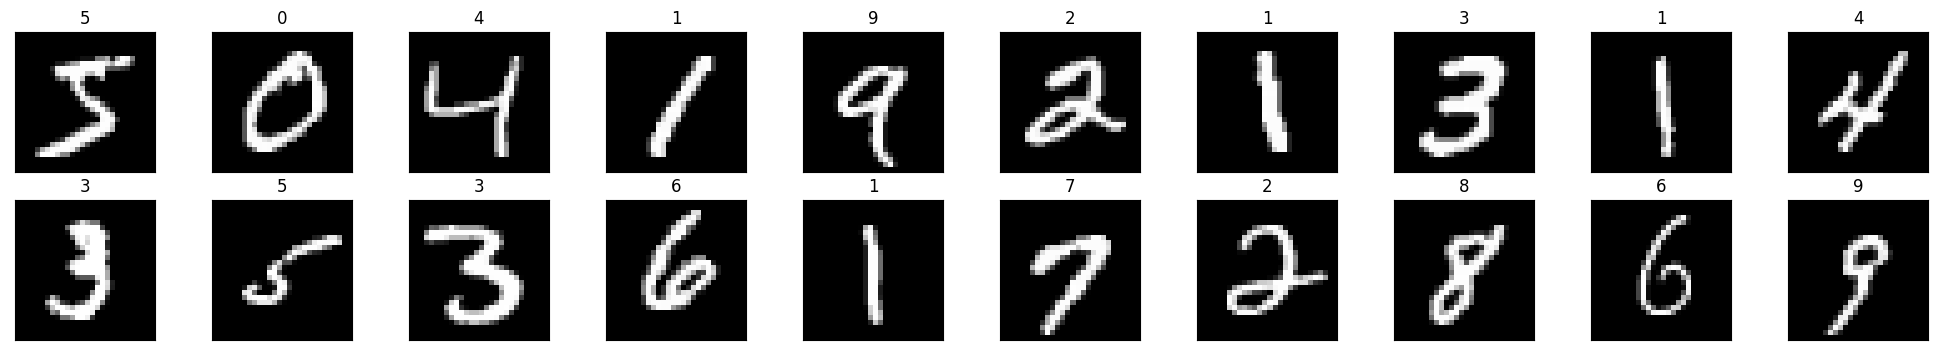

In [5]:
# visualizing the data in subplots
def visualize_data(data, cmap=None):
    fig = plt.figure(figsize=(25, 4)) # 25x4 inches
    for i in range(20):
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[]) # 2 rows, 10 columns 
        ax.imshow(data[i].view(28, 28), cmap=cmap) # 28x28 pixel image 
        ax.set_title(str(training_dataset.targets[i].item())) # label of the image (0-9) 
visualize_data(training_dataset.data)
visualize_data(training_dataset.data, cmap='gray')



In [6]:
# Buildina a neural network
input_layer = 784 # 28x28 pixels
hidden_layer1 = 64 # 64 neurons
hidden_layer2 = 32 # 32 neurons 
output_layer = 10 # 10 neurons (0-9)

model = nn.Sequential(
    nn.Linear(input_layer, hidden_layer1),
    nn.ReLU(),
    nn.Linear(hidden_layer1, hidden_layer2),
    nn.ReLU(),
    nn.Linear(hidden_layer2, output_layer),
)

In [7]:
# Cross entrophy Loss function
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(train_data))
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)

# Optimizer (SGD)
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [8]:
# Training the model
epoch = 10
for e in range(epoch):
    running_loss = 0
    for images, labels in train_data:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(train_data)}")



Training loss: 0.49187185338883005
Training loss: 0.20270569053794274
Training loss: 0.15321557084396323
Training loss: 0.12435068351441006
Training loss: 0.1062984847124102
Training loss: 0.0935010630217915
Training loss: 0.08307920579526967
Training loss: 0.07785323410774511
Training loss: 0.07088449108141309
Training loss: 0.06427988578736195


In [9]:
# predict label
def get_predicted_label(image):
    image = image.view(1, 28*28)
    with torch.no_grad():
        prediction_score = model(image)
    return np.argmax(prediction_score)

images, labels = next(iter(test_data))
print("Predicted Label: ", 
get_predicted_label(images[0]))
print("Actual Label: ", labels.numpy()[0])


Predicted Label:  tensor(2)
Actual Label:  2


In [13]:
# Getting the accuracy
totalCount = 0
accurateCount = 0
for images, labels in test_data:
    for i in range(len(labels)):
        predictedLabel = get_predicted_label(images[i])
        actualLabel = labels.numpy()[i]
        #print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)
        if(predictedLabel == actualLabel):
            accurateCount += 1
    totalCount += len(labels)
print("Total images tested: : ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", ((accurateCount/totalCount)*100), "%")



Total images tested: :  10000
Accurate predictions:  9740
Accuracy percentage:  97.39999999999999 %


Predicted Label:  tensor(9)  / Actual Label:  0
Predicted Label:  tensor(3)  / Actual Label:  5
Predicted Label:  tensor(5)  / Actual Label:  9
Predicted Label:  tensor(7)  / Actual Label:  8
Predicted Label:  tensor(6)  / Actual Label:  2
Predicted Label:  tensor(9)  / Actual Label:  4
Predicted Label:  tensor(2)  / Actual Label:  4
Predicted Label:  tensor(3)  / Actual Label:  9
Predicted Label:  tensor(6)  / Actual Label:  4
Predicted Label:  tensor(9)  / Actual Label:  5
Predicted Label:  tensor(4)  / Actual Label:  6
Predicted Label:  tensor(4)  / Actual Label:  5
Predicted Label:  tensor(0)  / Actual Label:  3
Predicted Label:  tensor(7)  / Actual Label:  3
Predicted Label:  tensor(3)  / Actual Label:  9
Predicted Label:  tensor(8)  / Actual Label:  9
Predicted Label:  tensor(4)  / Actual Label:  9
Predicted Label:  tensor(9)  / Actual Label:  7
Predicted Label:  tensor(2)  / Actual Label:  7
Predicted Label:  tensor(0)  / Actual Label:  5
Total images tested: :  685
Accurate pre

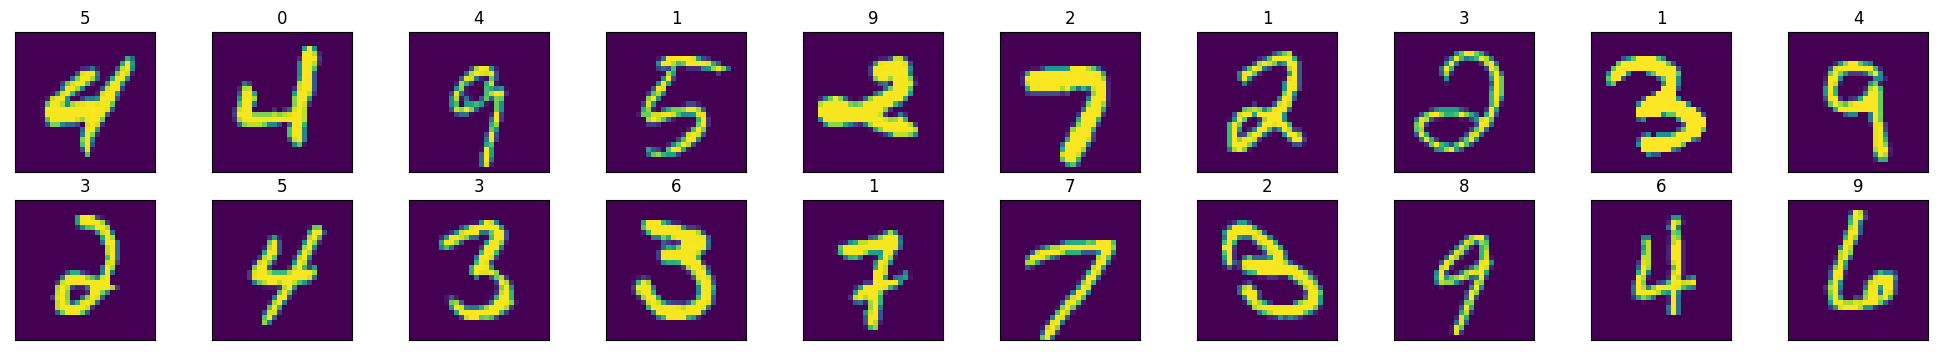

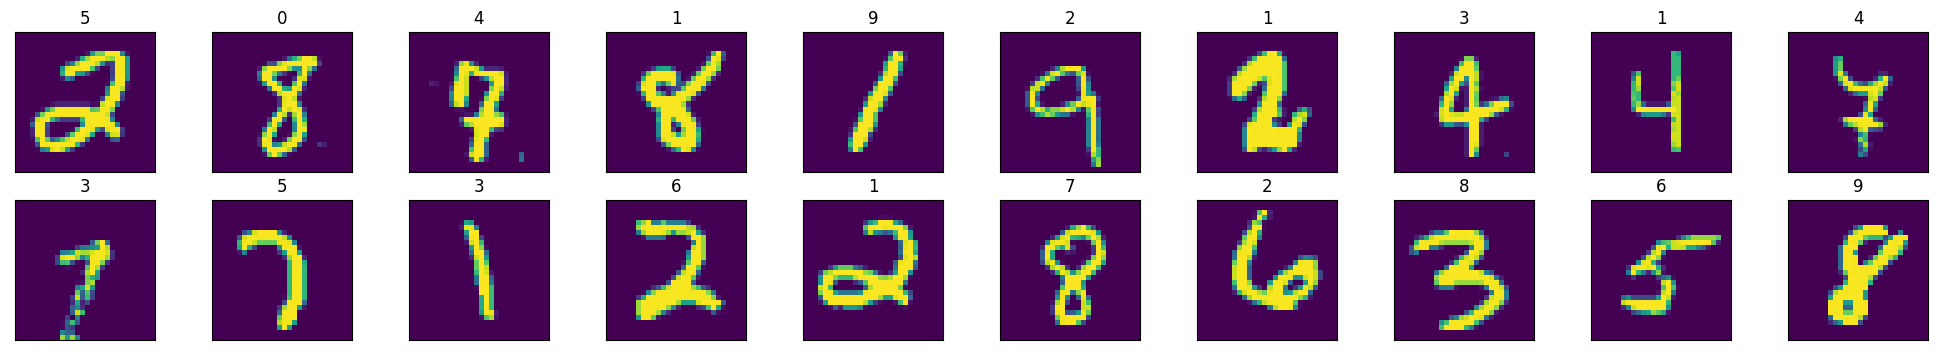

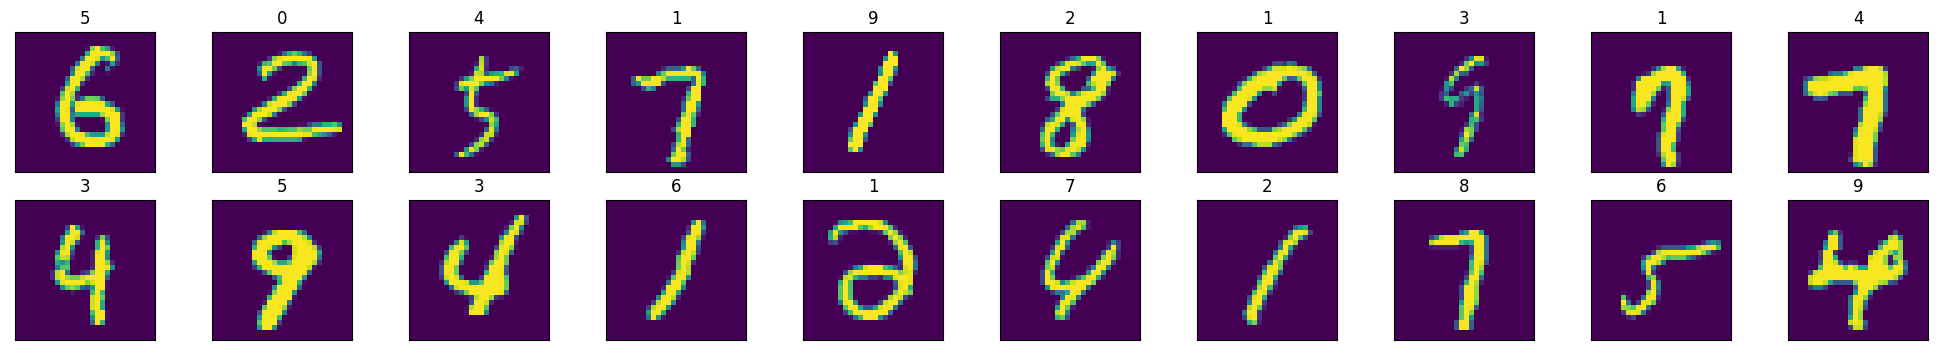

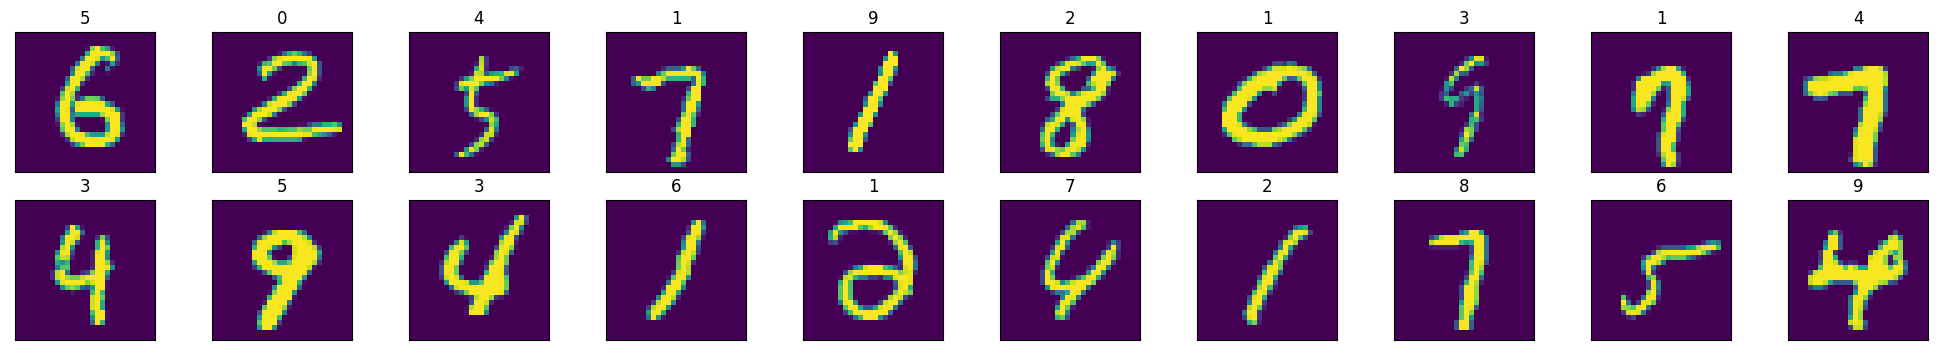

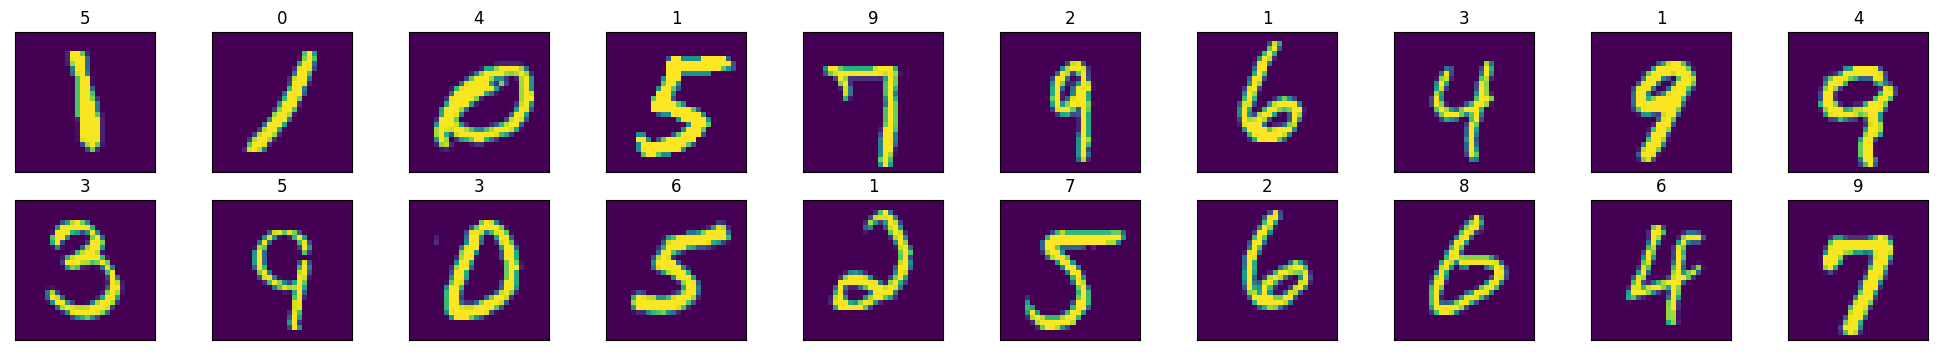

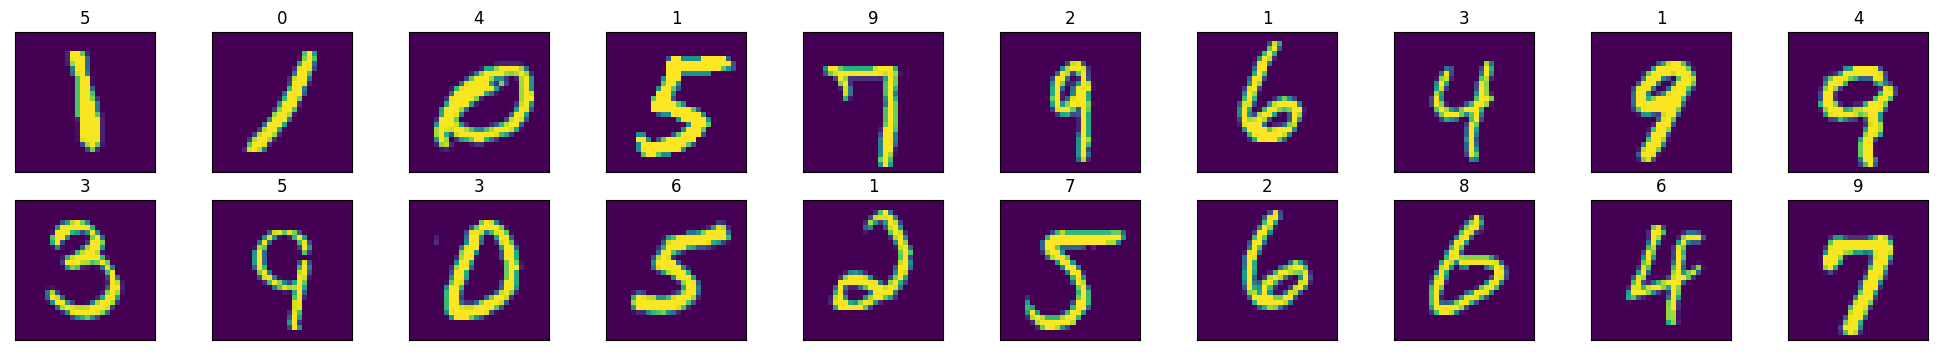

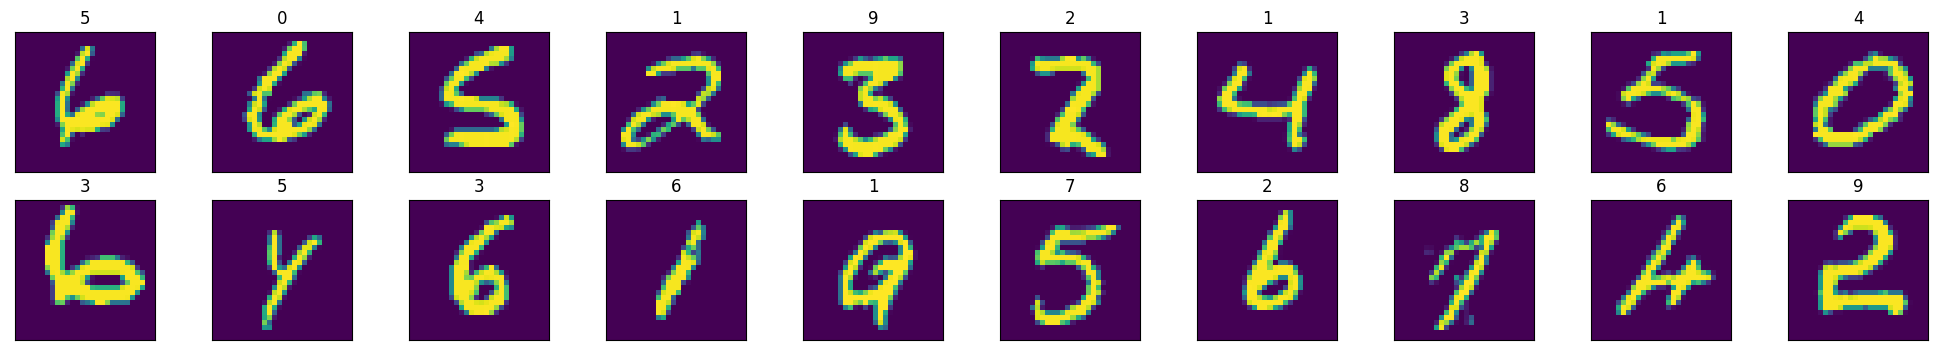

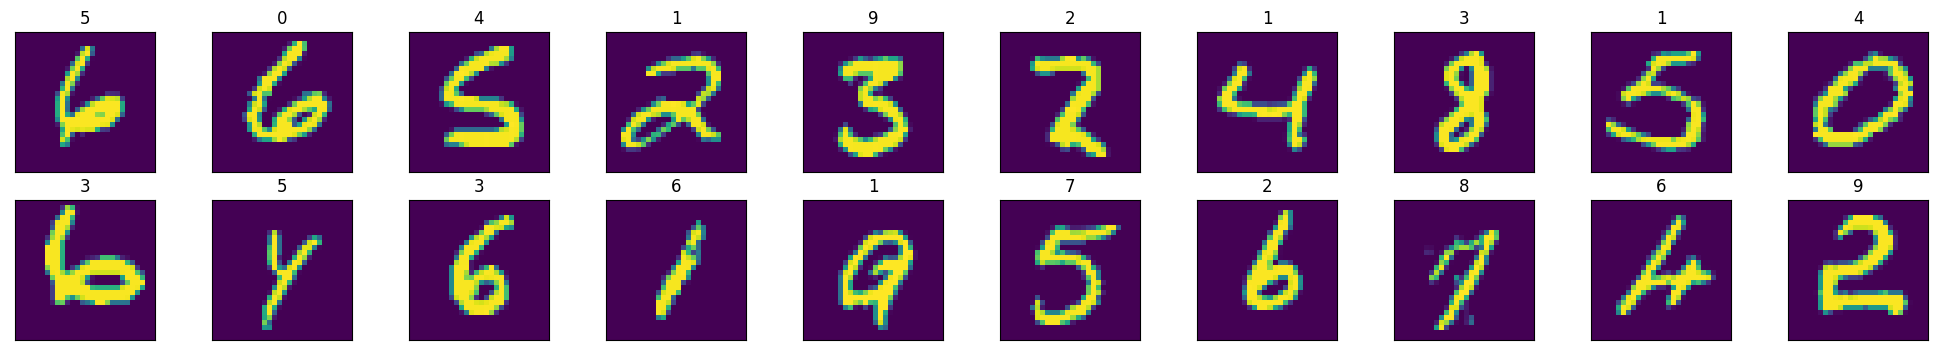

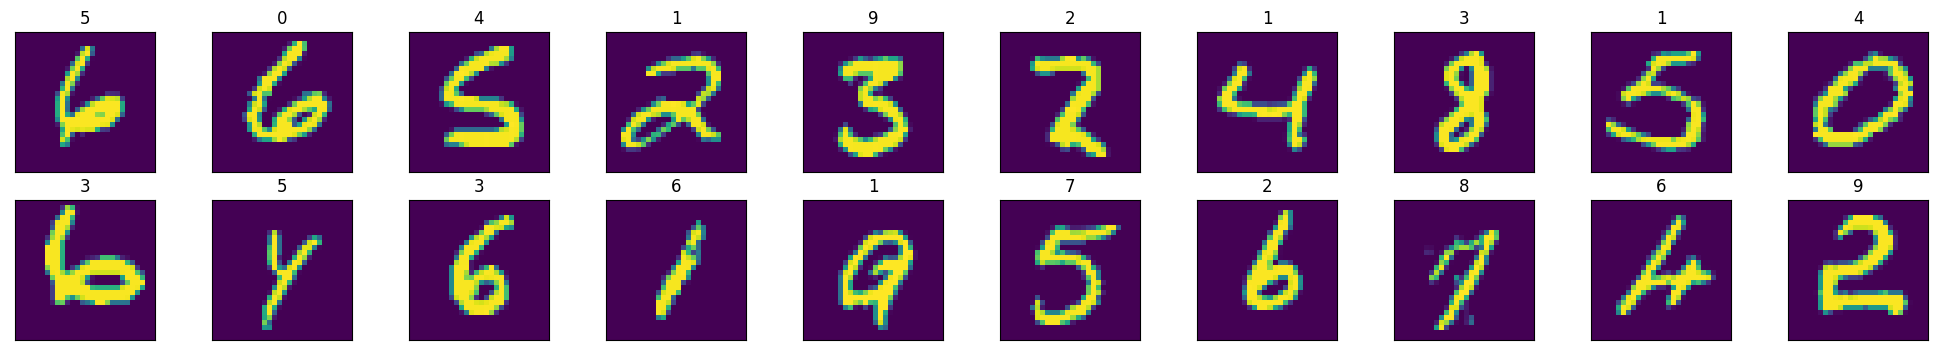

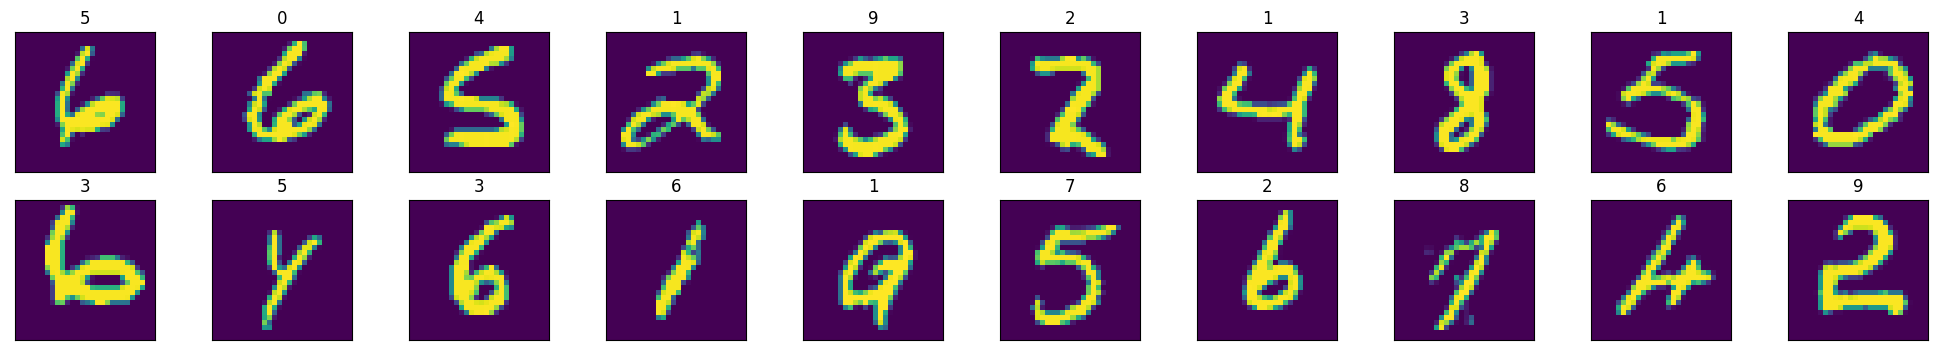

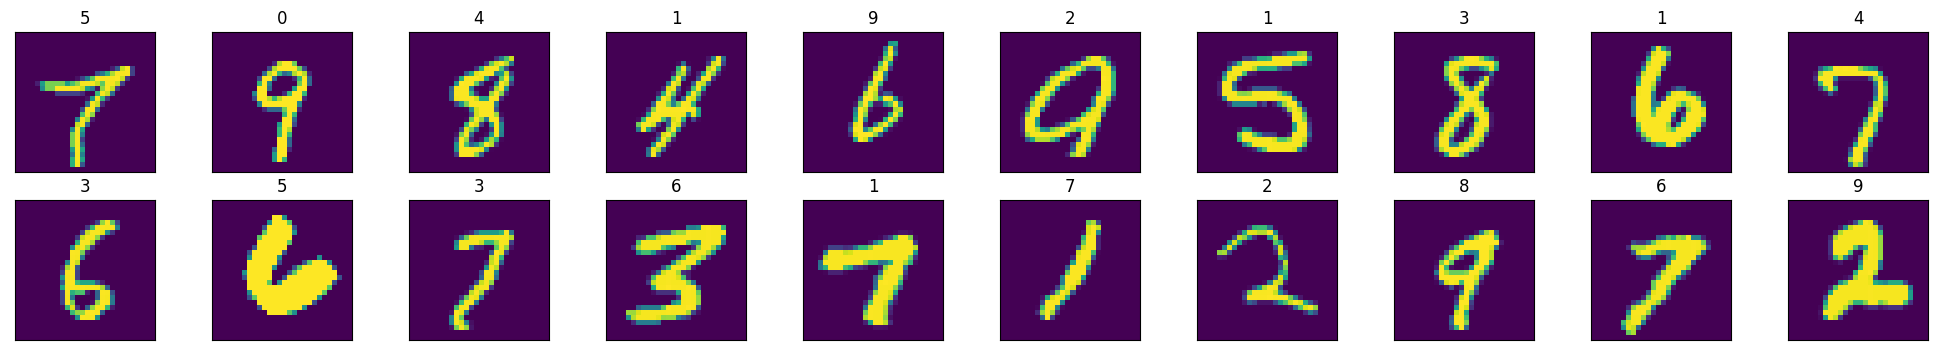

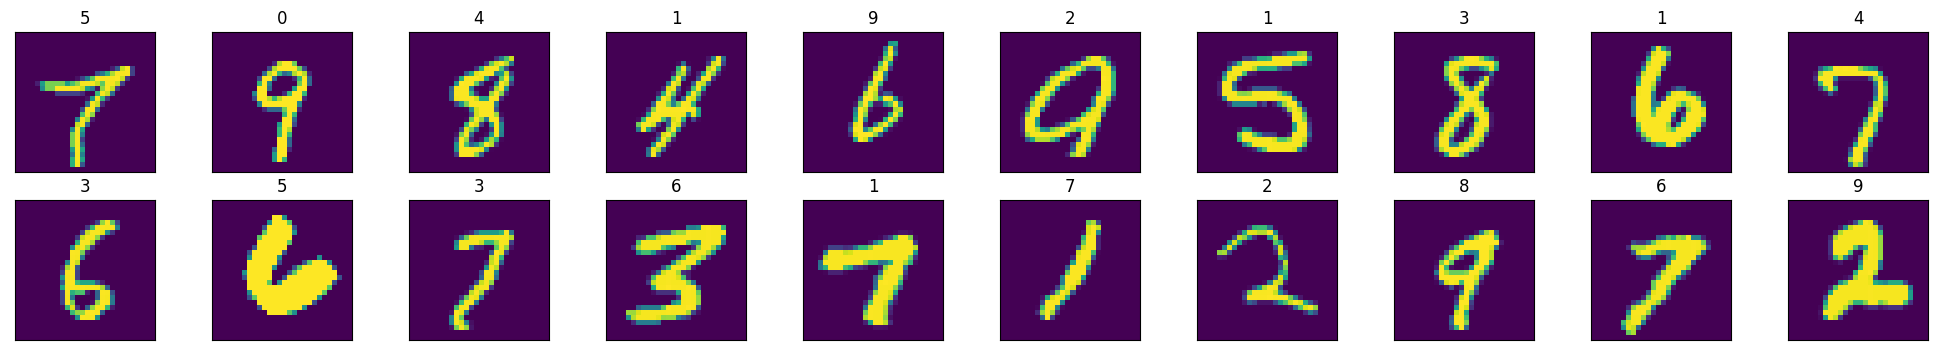

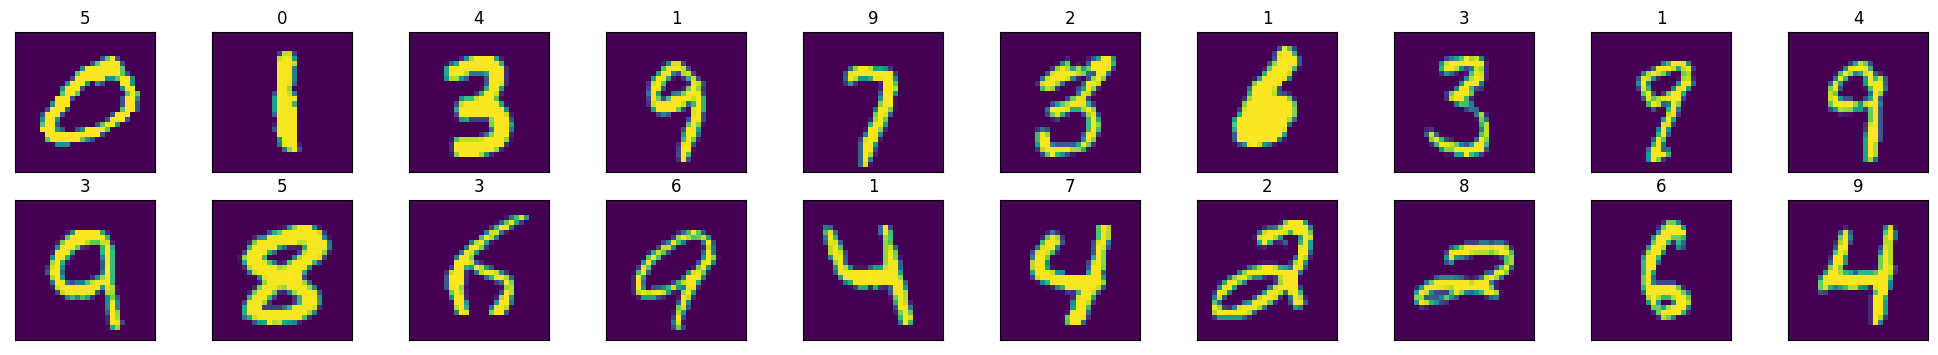

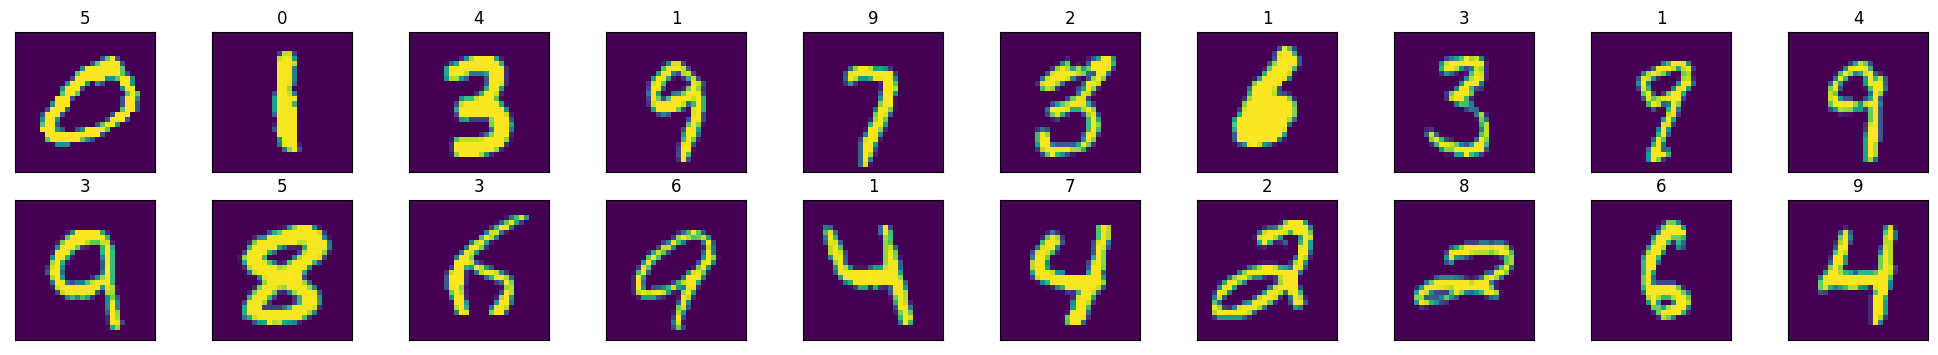

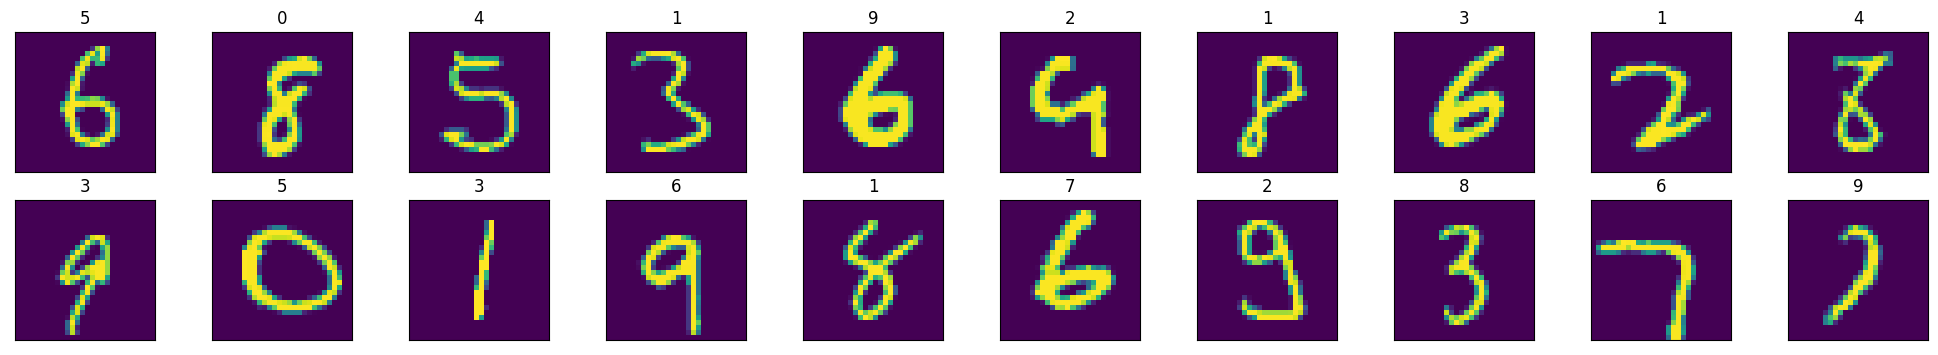

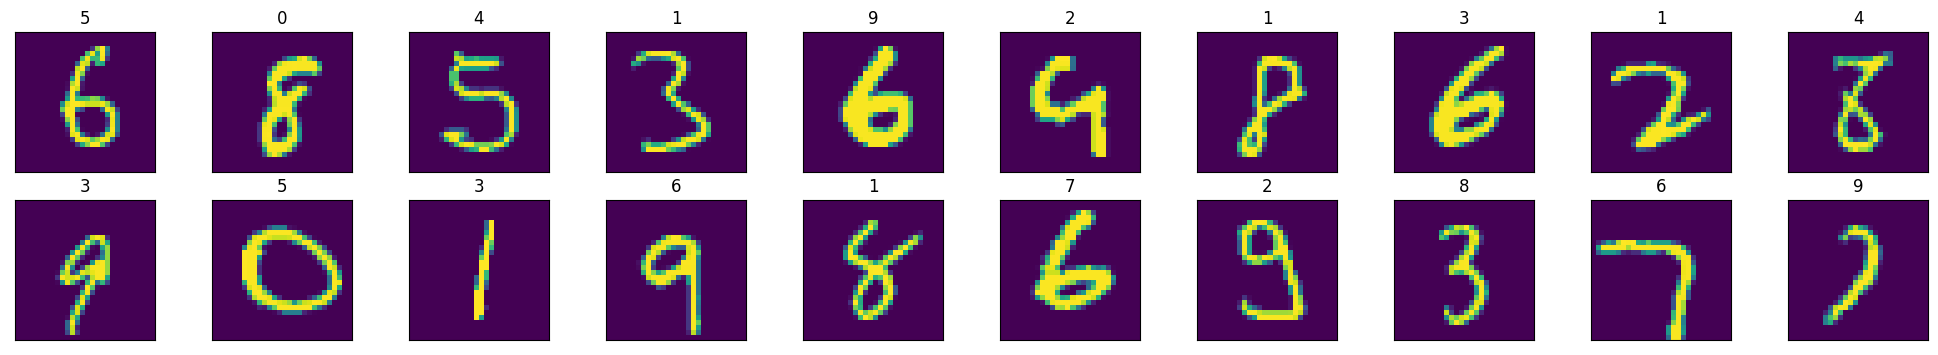

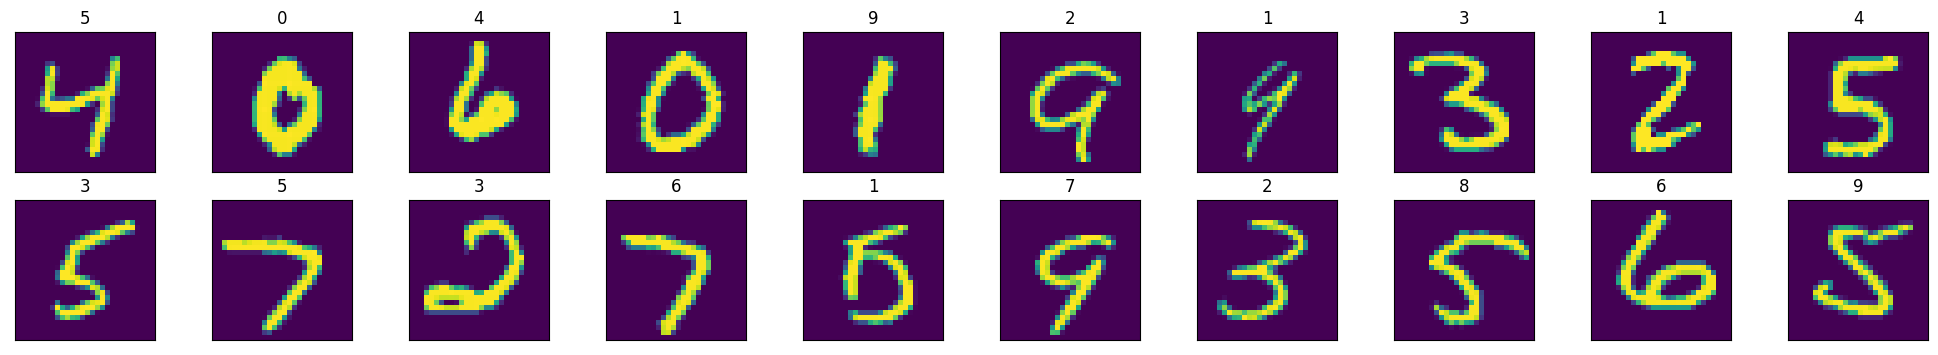

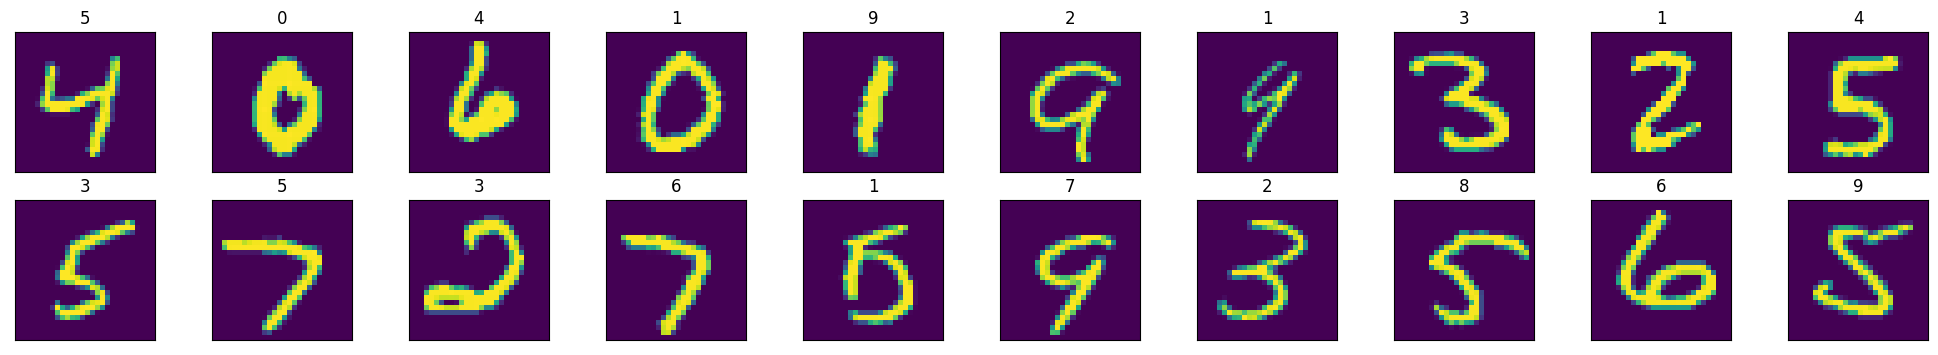

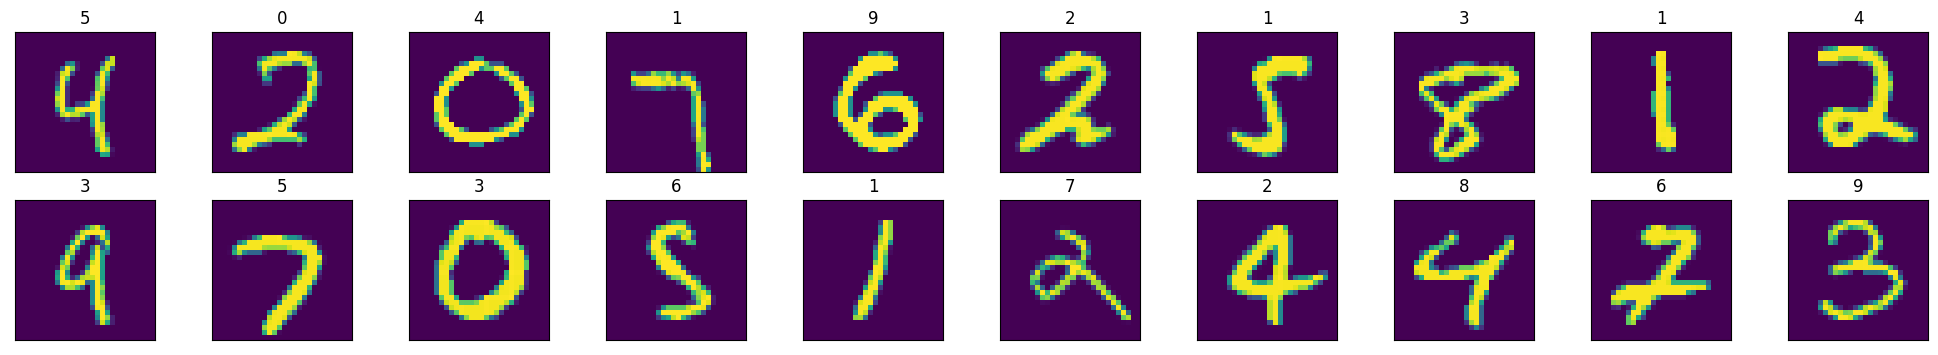

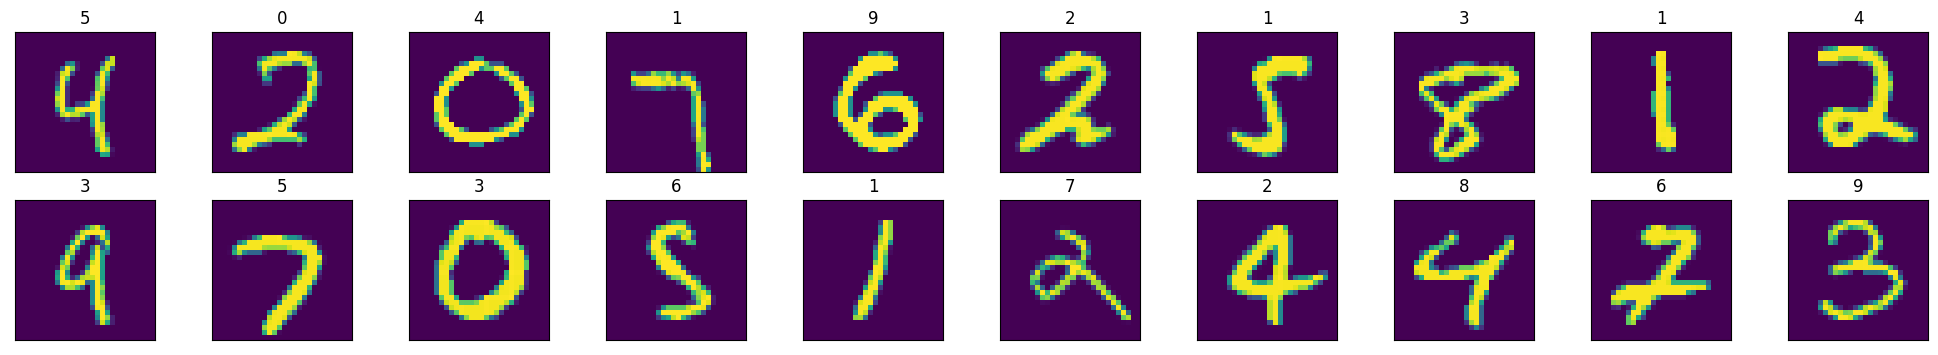

In [12]:
# Visualizing the wrong predictions
def visualize_images(data, cmap=None):
    fig = plt.figure(figsize=(25, 4)) # 25x4 inches
    for i in range(20):
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[]) # 2 rows, 10 columns 
        ax.imshow(data[i].view(28, 28), cmap=cmap) # 28x28 pixel image 
        ax.set_title(str(training_dataset.targets[i].item())) # label of the image (0-9)


def label_issues(number_of_issues=20):
    totalCount = 0
    accurateCount = 0
    count = 0
    for images, labels in test_data:
        for i in range(len(labels)):
            if count == number_of_issues:
                break
            predictedLabel = get_predicted_label(images[i])
            actualLabel = labels.numpy()[i]
            if(predictedLabel != actualLabel):
                visualize_images(images)
                count += 1
                print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)
                accurateCount += 1
            totalCount += 1
    print("Total images tested: : ", totalCount)
    print("Accurate predictions: ", accurateCount)
    print("Accuracy percentage: ", ((accurateCount/totalCount)*100), "%")
label_issues()

